# Exploratory Data Analysis

This is an exploratory data analysis on a series of machine learning datasets that have been combined into one large dataset. The aim of this dataset is to test and train an intrusion detection system machine learning algorithm. The goal for this assignment is to identify significant variables and gain a better understanding of the data prior to building a model.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Data Understanding

<p> This section explores the shape of the data, the contents of the data, and aims to discern if there are any abnormalities within the data (i.e. data types that don't make sense) and why those abnormalities exist. Those abnormalities will also be corrected.</p>

In [2]:
#import .csv
df = pd.read_csv("df.csv")

In [3]:
#check the shape of the data
df.shape

(2830743, 81)

In [4]:
#explore the top of the dataset
df.head()

Unnamed: 0 Table   Destination Port   Flow Duration   Total Fwd Packets  \
0           0  DDoS              54865               3                   2   
1           1  DDoS              55054             109                   1   
2           2  DDoS              55055              52                   1   
3           3  DDoS              46236              34                   1   
4           4  DDoS              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                       6   
4                             0                       6   

    Fwd Packet Length Min  ...   min_seg_size_forward  Active Mean  \
0                       6  ...                     20          0.0   
1                       6  ...                     20          0.0   
2                       6  ...                     20          0.0   
3                       6  ...                     20          0.0   
4                       6  ...                     20          0.0   

    Active Std   Active Max   Active Min  Idle Mean   Idle Std   Idle Max  \
0          0.0            0            0        0.0        0.0          0   
1          0.0            0            0        0.0        0.0          0   
2          0.0            0            0        0.0        0.0          0   
3          0.0            0            0        0.0        0.0          0   
4          0.0            0            0        0.0        0.0          0   

    Idle Min   Label  
0          0  BENIGN  
1          0  BENIGN  
2          0  BENIGN  
3          0  BENIGN  
4          0  BENIGN  

[5 rows x 81 columns]

In [5]:
#determine which variables are categorical and may need to be encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 81 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Table                         object 
 2    Destination Port             int64  
 3    Flow Duration                int64  
 4    Total Fwd Packets            int64  
 5    Total Backward Packets       int64  
 6   Total Length of Fwd Packets   int64  
 7    Total Length of Bwd Packets  int64  
 8    Fwd Packet Length Max        int64  
 9    Fwd Packet Length Min        int64  
 10   Fwd Packet Length Mean       float64
 11   Fwd Packet Length Std        float64
 12  Bwd Packet Length Max         int64  
 13   Bwd Packet Length Min        int64  
 14   Bwd Packet Length Mean       float64
 15   Bwd Packet Length Std        float64
 16  Flow Bytes/s                  float64
 17   Flow Packets/s               float64
 18   Flow IAT Mean        

<p> Table and Label are the two categorical variables in this dataset. Label will need to be encoded in order to be used in further analysis. Label is the key feature that we need to find correlation for.</p>

In [6]:
#check the column names for irregularities
df.columns

Index(['Unnamed: 0', 'Table', ' Destination Port', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Pac

<p>Some of the column names have unneccessary spaces in them. For cleanliness, the extra spaces need to be removed.</p>

In [7]:
#remove extra spaces from column names
df.rename(columns=lambda x: x.replace(" ", ""), inplace=True)

#unnamed:0 appears to be an old index- this can be removed.
df.drop('Unnamed:0', axis=1, inplace=True)

In [8]:
df.columns

Index(['Table', 'DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',

In [9]:
#number of benign entries
label_benign = df[df['Label'] == 'BENIGN']
len(label_benign)

2273097

In [10]:
#number of malicious entries
label_malicious = df[df['Label'] != 'BENIGN']
len(label_malicious)

557646

In [11]:
#these will be used for the encoding process
df["Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

<p>The target variable in this dataset is the Label column, as this tells us whether or not an intrusion has occured. The next steps will look for variables with the most correlation to the Label column.</p>

## Feature Analysis

<p> This section explores the distribution of each feature using histograms, box plots, or density plots, examines summary statistics such as mean, median, standard deviation, and range, and identifies potential outliers or extreme values that may require further investigation.</p>

In [12]:
#descriptive statistics of the data
df.describe()

DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
count     2.830743e+06  2.830743e+06     2.830743e+06          2.830743e+06   
mean      8.071483e+03  1.478566e+07     9.361160e+00          1.039377e+01   
std       1.828363e+04  3.365374e+07     7.496728e+02          9.973883e+02   
min       0.000000e+00 -1.300000e+01     1.000000e+00          0.000000e+00   
25%       5.300000e+01  1.550000e+02     2.000000e+00          1.000000e+00   
50%       8.000000e+01  3.131600e+04     2.000000e+00          2.000000e+00   
75%       4.430000e+02  3.204828e+06     5.000000e+00          4.000000e+00   
max       6.553500e+04  1.200000e+08     2.197590e+05          2.919220e+05   

       TotalLengthofFwdPackets  TotalLengthofBwdPackets  FwdPacketLengthMax  \
count             2.830743e+06             2.830743e+06        2.830743e+06   
mean              5.493024e+02             1.616264e+04        2.075999e+02   
std               9.993589e+03             2.263088e+06        7.171848e+02   
min               0.000000e+00             0.000000e+00        0.000000e+00   
25%               1.200000e+01             0.000000e+00        6.000000e+00   
50%               6.200000e+01             1.230000e+02        3.700000e+01   
75%               1.870000e+02             4.820000e+02        8.100000e+01   
max               1.290000e+07             6.554530e+08        2.482000e+04   

       FwdPacketLengthMin  FwdPacketLengthMean  FwdPacketLengthStd  ...  \
count        2.830743e+06         2.830743e+06        2.830743e+06  ...   
mean         1.871366e+01         5.820194e+01        6.891013e+01  ...   
std          6.033935e+01         1.860912e+02        2.811871e+02  ...   
min          0.000000e+00         0.000000e+00        0.000000e+00  ...   
25%          0.000000e+00         6.000000e+00        0.000000e+00  ...   
50%          2.000000e+00         3.400000e+01        0.000000e+00  ...   
75%          3.600000e+01         5.000000e+01        2.616295e+01  ...   
max          2.325000e+03         5.940857e+03        7.125597e+03  ...   

       act_data_pkt_fwd  min_seg_size_forward    ActiveMean     ActiveStd  \
count      2.830743e+06          2.830743e+06  2.830743e+06  2.830743e+06   
mean       5.418218e+00         -2.741688e+03  8.155132e+04  4.113412e+04   
std        6.364257e+02          1.084989e+06  6.485999e+05  3.933815e+05   
min        0.000000e+00         -5.368707e+08  0.000000e+00  0.000000e+00   
25%        0.000000e+00          2.000000e+01  0.000000e+00  0.000000e+00   
50%        1.000000e+00          2.400000e+01  0.000000e+00  0.000000e+00   
75%        2.000000e+00          3.200000e+01  0.000000e+00  0.000000e+00   
max        2.135570e+05          1.380000e+02  1.100000e+08  7.420000e+07   

          ActiveMax     ActiveMin      IdleMean       IdleStd       IdleMax  \
count  2.830743e+06  2.830743e+06  2.830743e+06  2.830743e+06  2.830743e+06   
mean   1.531825e+05  5.829582e+04  8.316037e+06  5.038439e+05  8.695752e+06   
std    1.025825e+06  5.770923e+05  2.363008e+07  4.602984e+06  2.436689e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.100000e+08  1.100000e+08  1.200000e+08  7.690000e+07  1.200000e+08   

            IdleMin  
count  2.830743e+06  
mean   7.920031e+06  
std    2.336342e+07  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.200000e+08  

[8 rows x 78 columns]

In [13]:
df['Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

<p> In order to use the labels in our analysis, they need to be converted to numbers. This is accomplished using LabelEncoder(). It could also be accomplished using .get_dummies().</p>

In [14]:
#creating a numerical label for each categorical label to use the data in future steps
label_encoder = preprocessing.LabelEncoder()
df['label_code'] = label_encoder.fit_transform(df['Label'])

#verifying it generated correctly
print(df['label_code'].value_counts())

0     2273097
4      231073
10     158930
2      128027
3       10293
7        7938
11       5897
6        5796
5        5499
1        1966
12       1507
14        652
9          36
13         21
8          11
Name: label_code, dtype: int64


In [15]:
#creating a label legend for use in future steps
label_legend = list(zip(df['Label'].unique(), df['label_code'].unique()))
print(label_legend)

[('BENIGN', 0), ('DDoS', 2), ('PortScan', 10), ('Bot', 1), ('Infiltration', 9), ('Web Attack � Brute Force', 12), ('Web Attack � XSS', 14), ('Web Attack � Sql Injection', 13), ('FTP-Patator', 7), ('SSH-Patator', 11), ('DoS slowloris', 6), ('DoS Slowhttptest', 5), ('DoS Hulk', 4), ('DoS GoldenEye', 3), ('Heartbleed', 8)]


<AxesSubplot:>

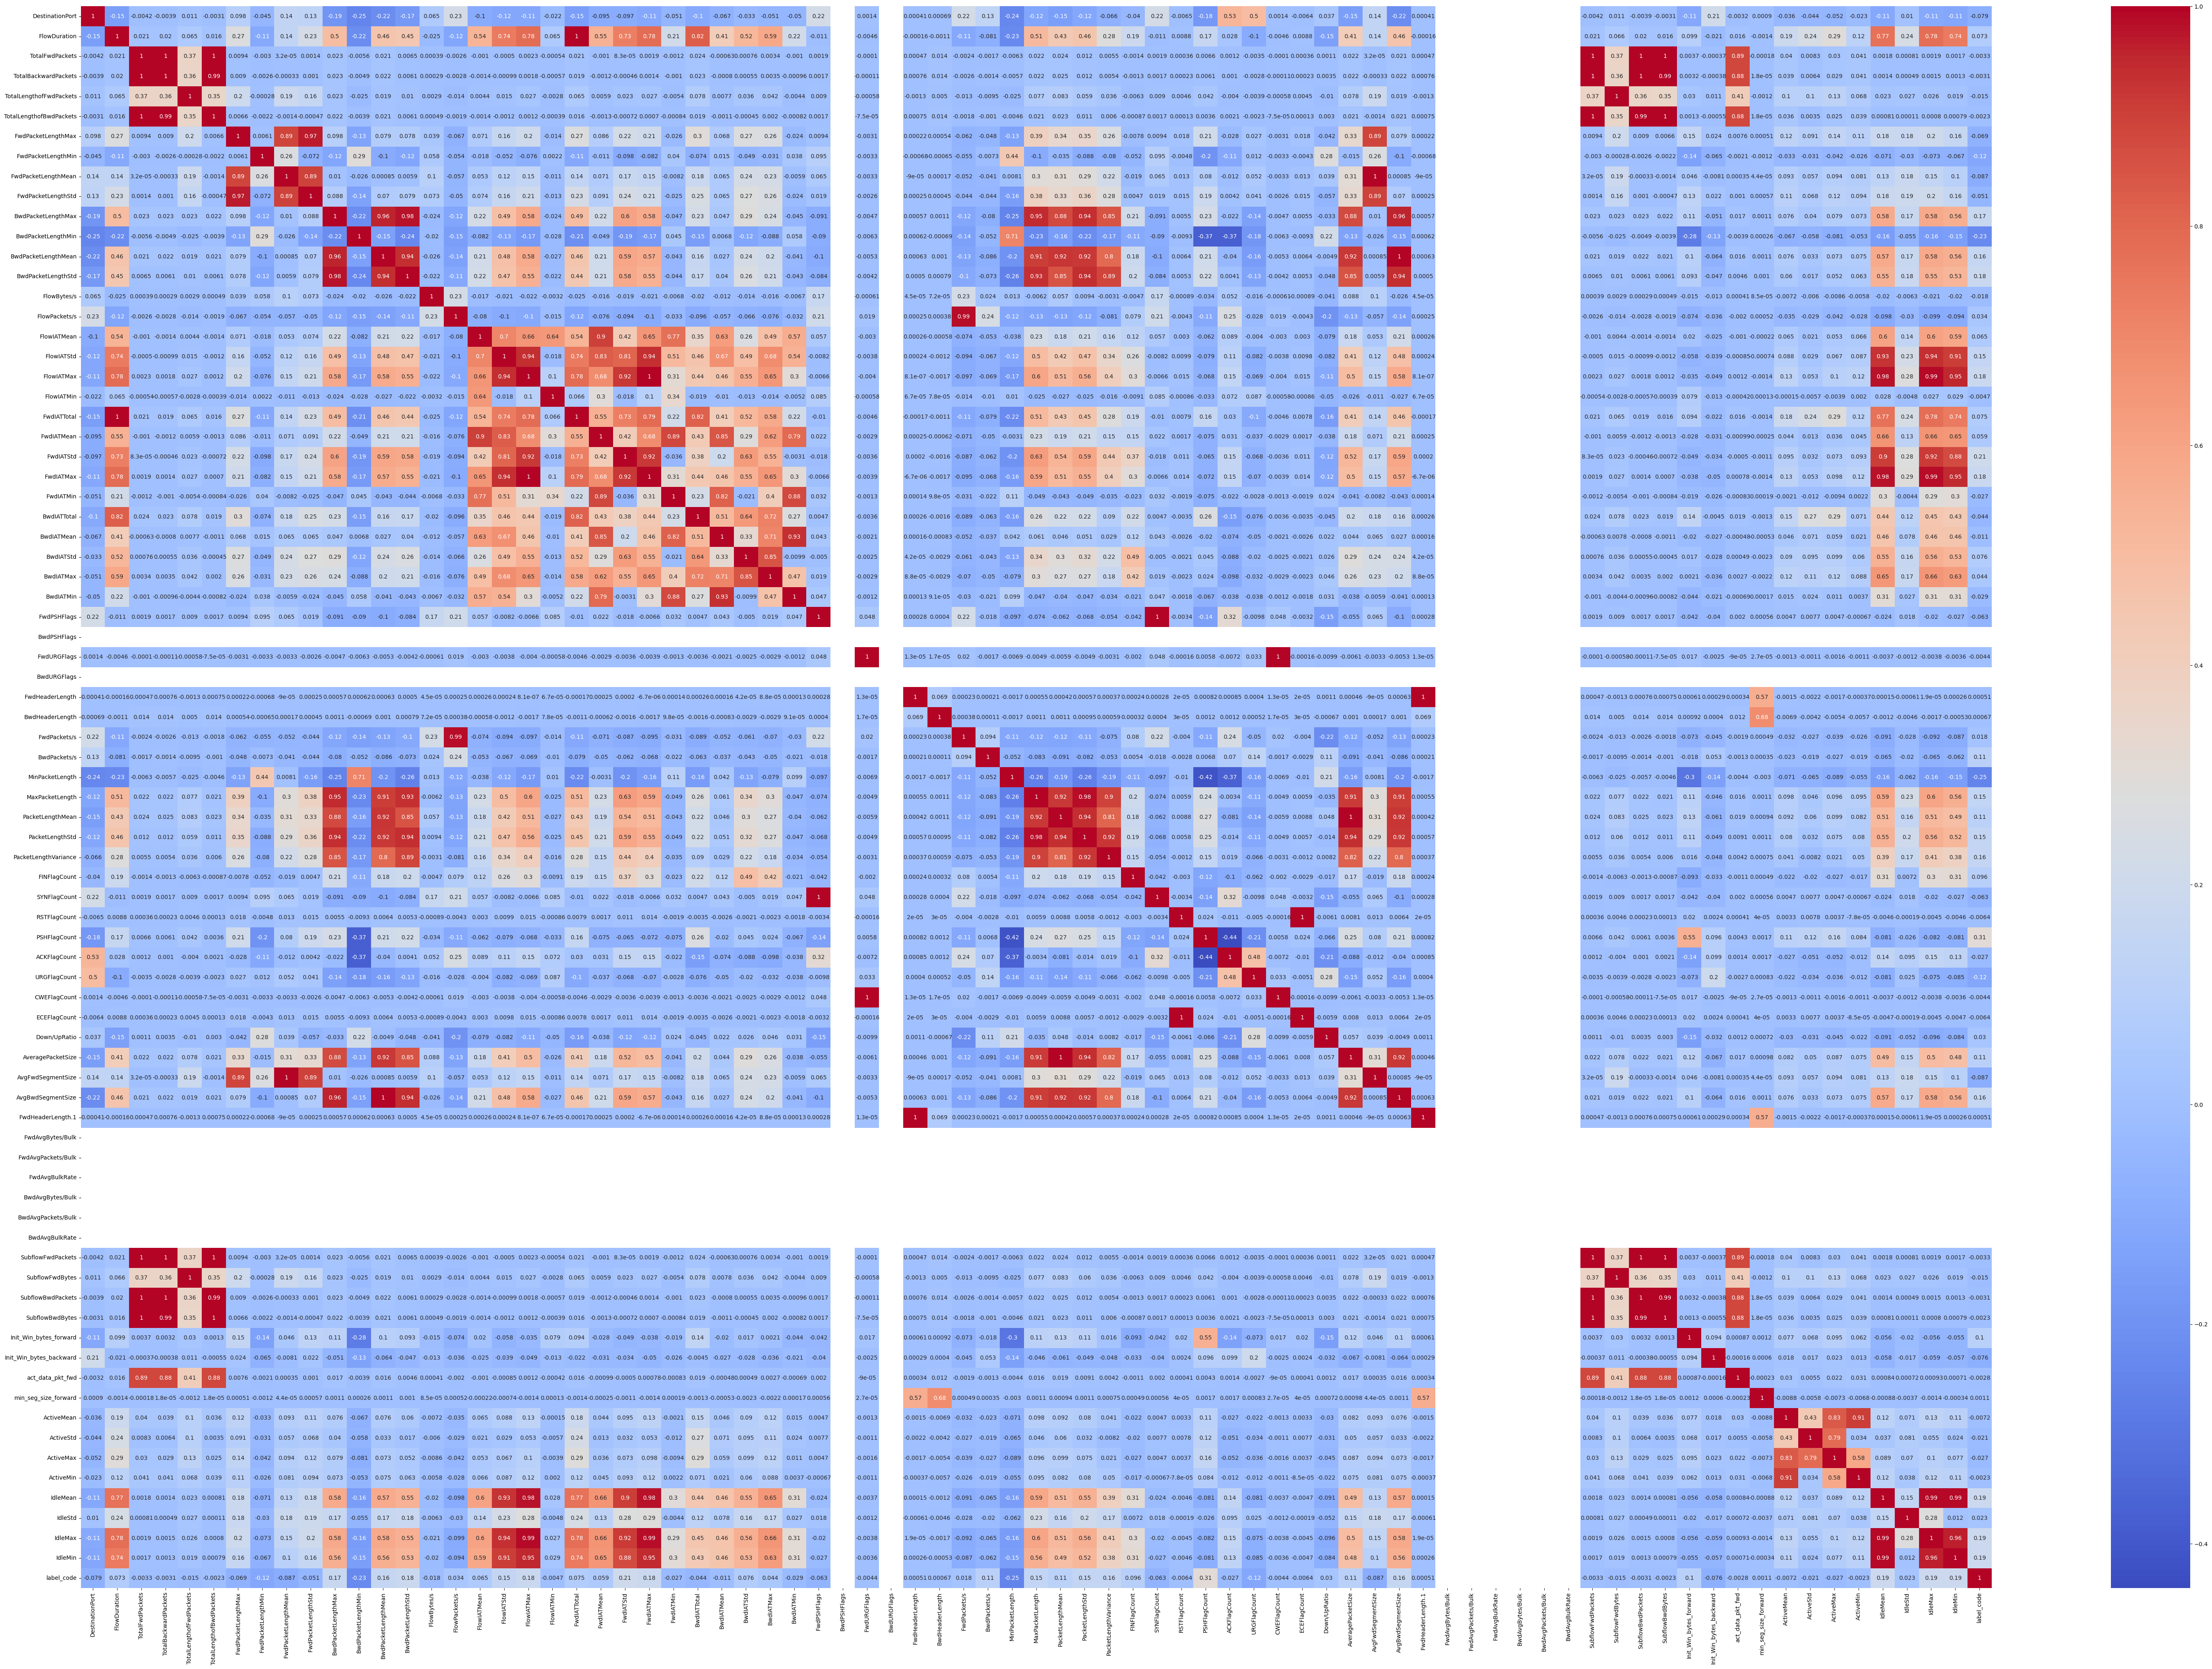

In [16]:
plt.figure(figsize=(75,50))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<p>Based on the above heat map, max, mean, and std values appear to have positive weak correlation with the label codes and min values appear to have negative weak correlation with the label codes. The strongest correlation is the PSH Flag Count.</p>

In [17]:
correlated_cols = 'BwdPacketLengthMax', 'BwdPacketLengthMean', 'BwdPacketLengthStd', 'FlowIATStd', 'FlowIATMax', 'FwdIATStd', 'FwdIATMax', 'BwdPackets/s', 'MaxPacketLength', 'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance', 'PSHFlagCount', 'AveragePacketSize', 'AvgBwdSegmentSize', 'Init_Win_bytes_forward', 'IdleMean', 'IdleMax', 'IdleMin', 'FwdPacketLengthMin', 'BwdPacketLengthMin', 'MinPacketLength', 'URGFlagCount'

### Data Relationships

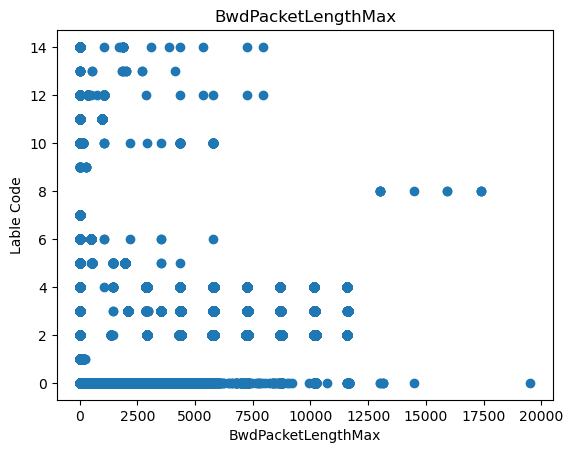

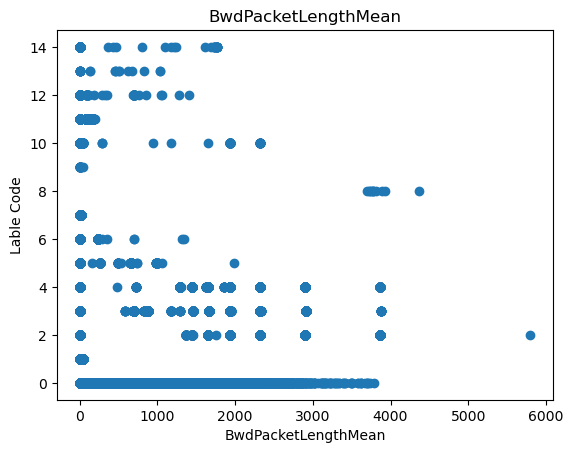

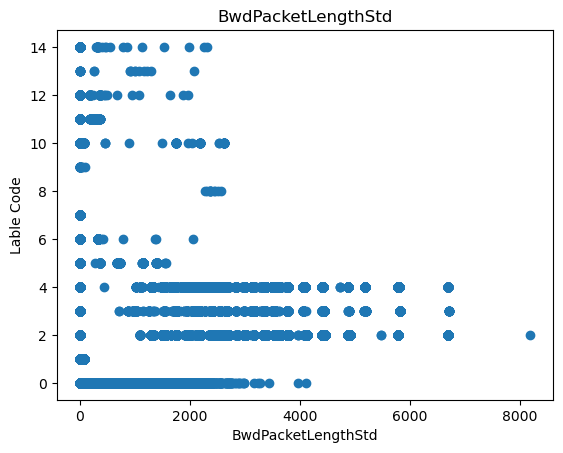

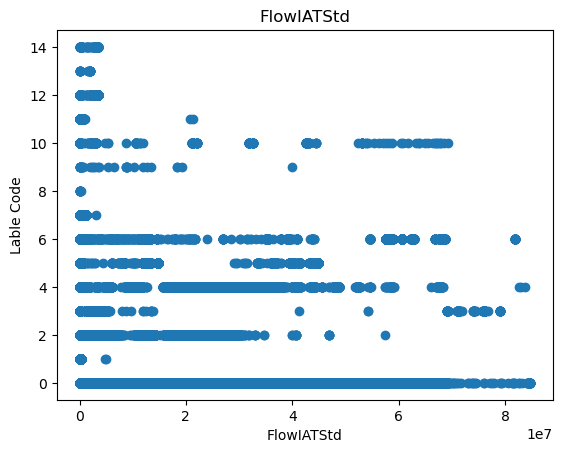

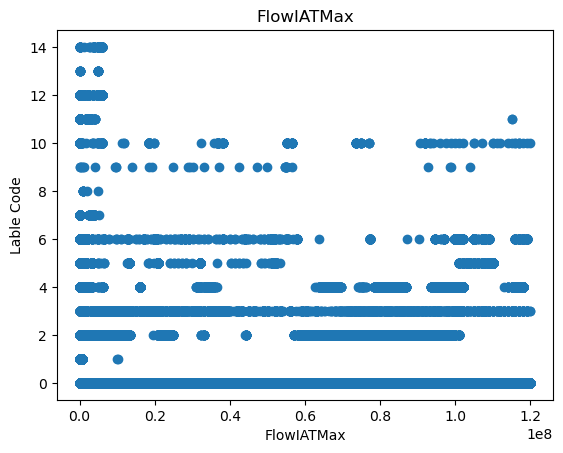

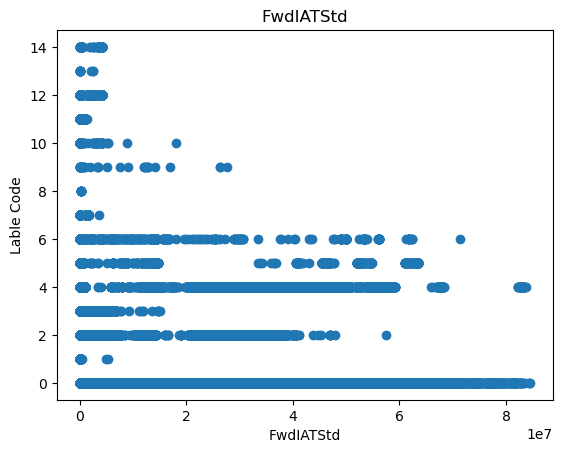

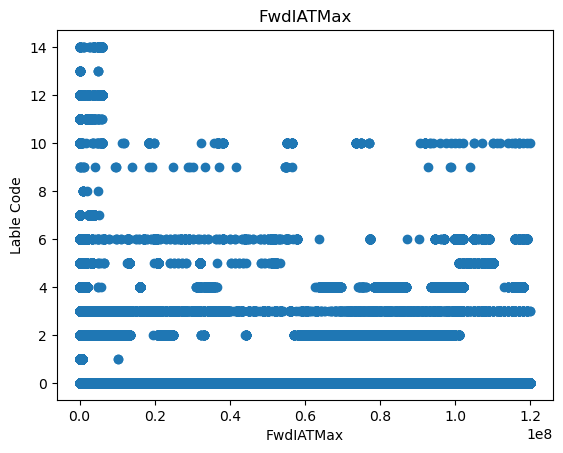

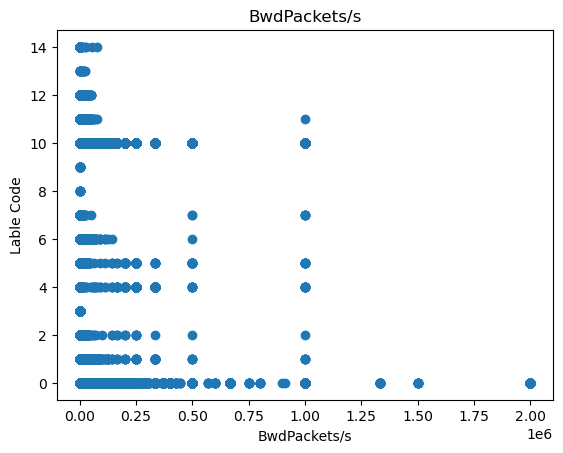

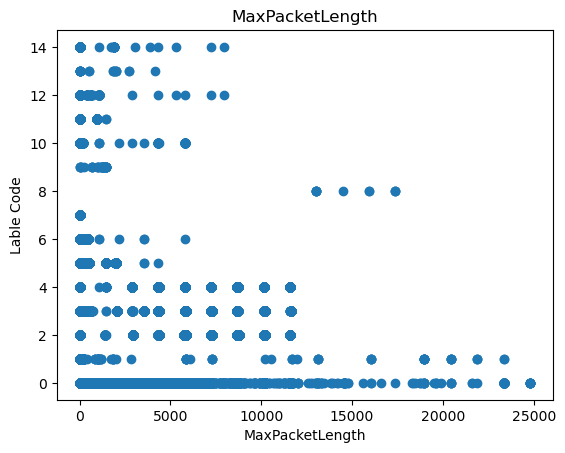

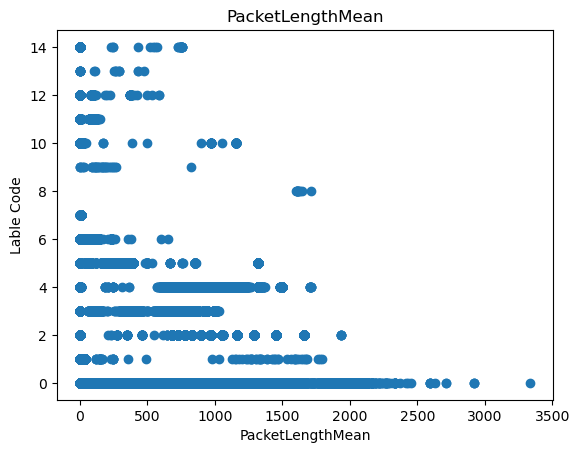

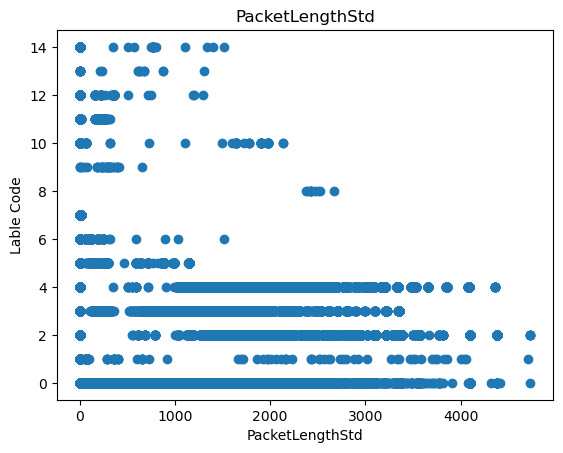

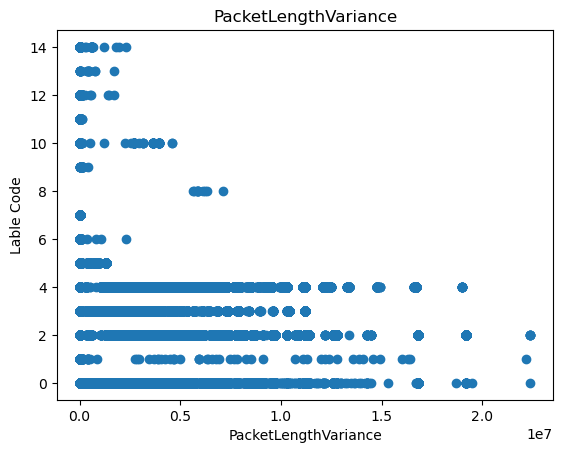

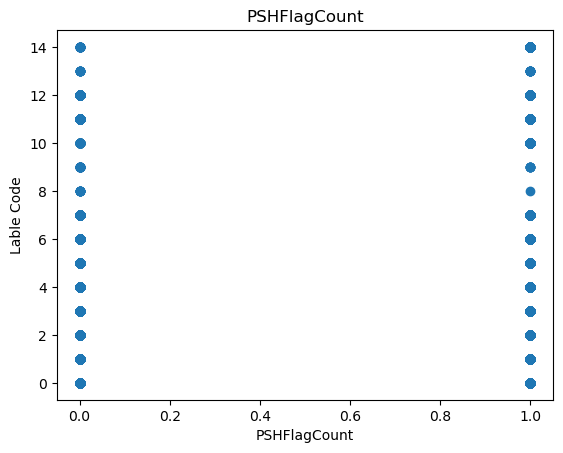

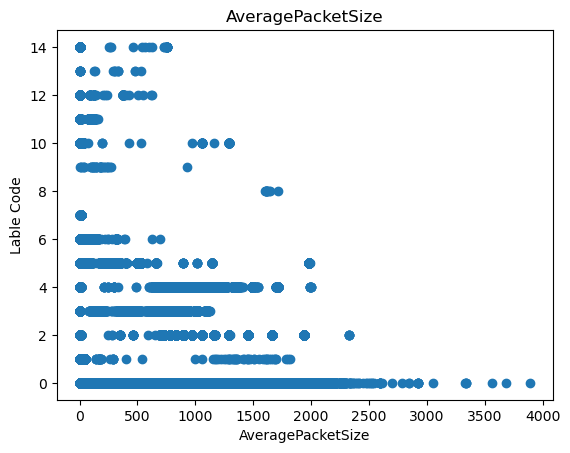

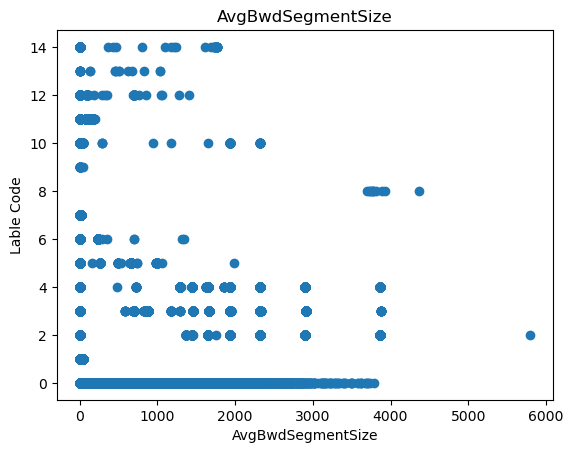

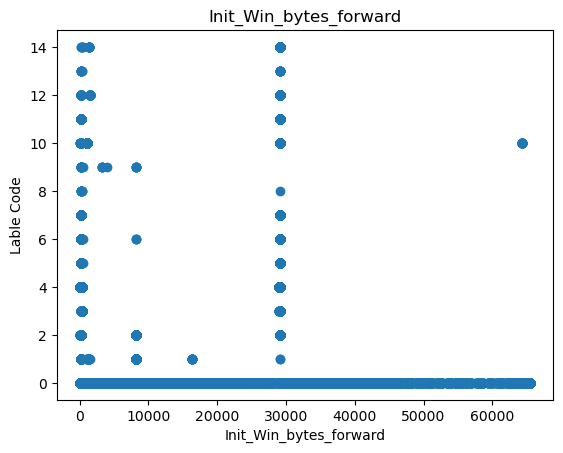

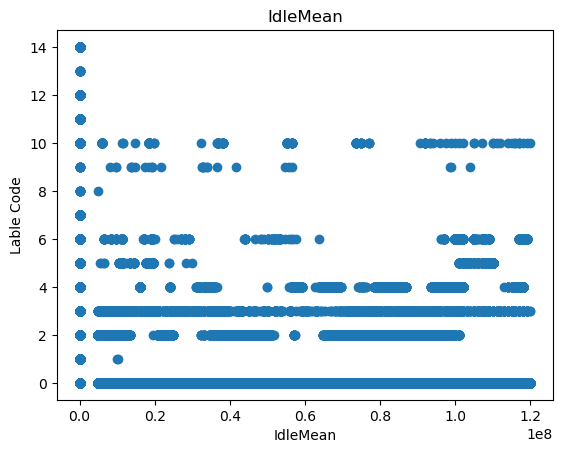

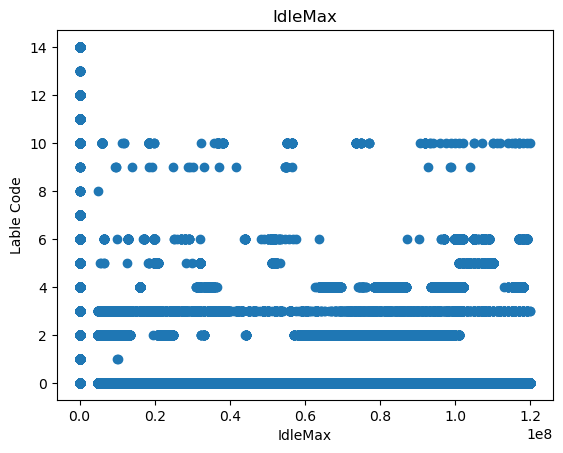

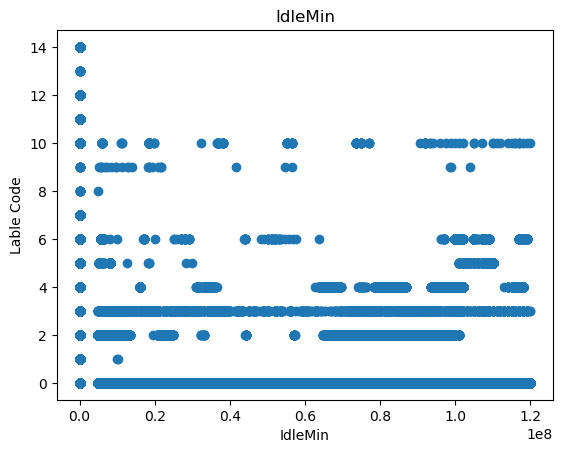

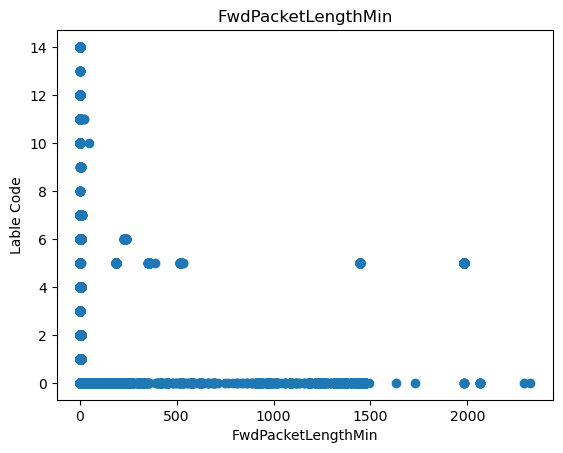

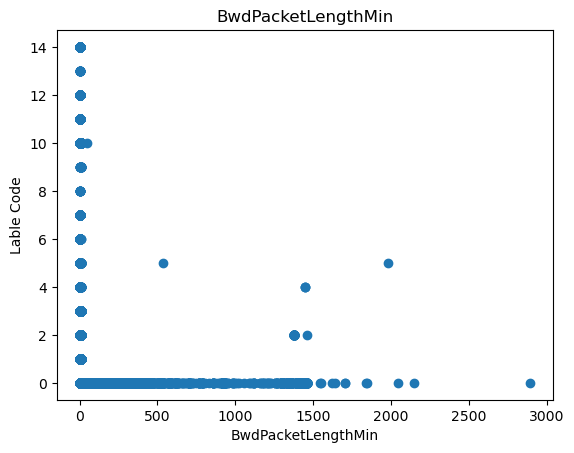

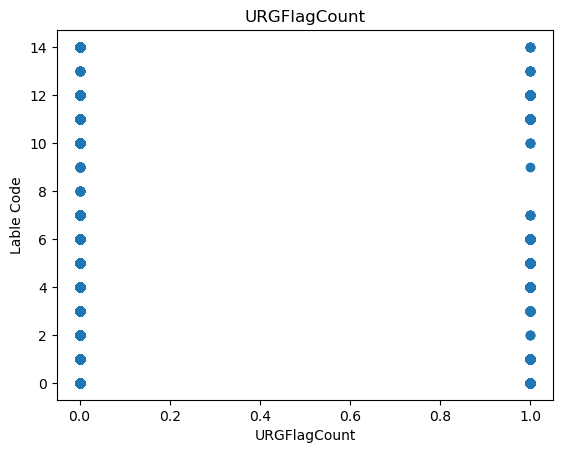

In [18]:
#evaluating all traffic in relation to the label code
for col in correlated_cols:
    x = df[col]
    y = df['label_code']
    plt.scatter(x, y)
    plt.xlabel(col)
    plt.ylabel('Lable Code')
    plt.title(col)
    plt.show()

<p>The above scatter plots show a relationship between each label code and the correlated features.</p>

<p>They allow me to visualise how malicious data (1-14) differs from benign data (0) and how even if the range in some of the features is the same, there are noticeable pattern differences within that range. What I find particularly fascinating is that it is easy to see how some of these malicious attacks could disguise themselves as normal traffic this way.</p>

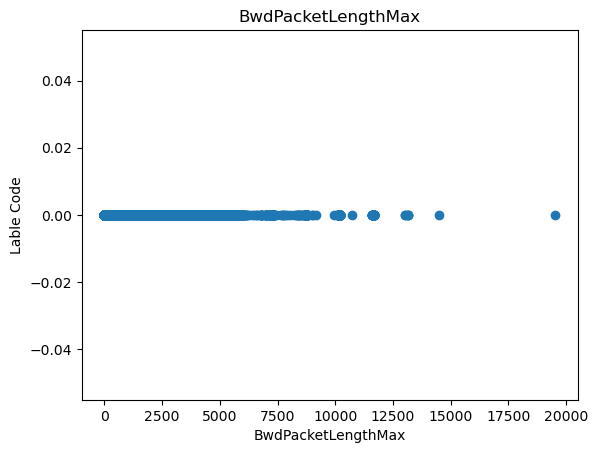

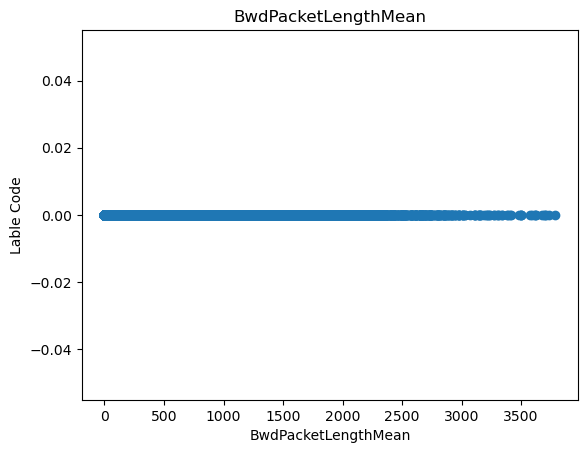

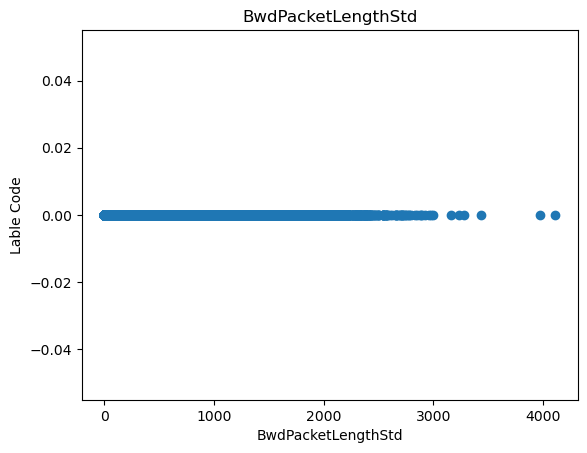

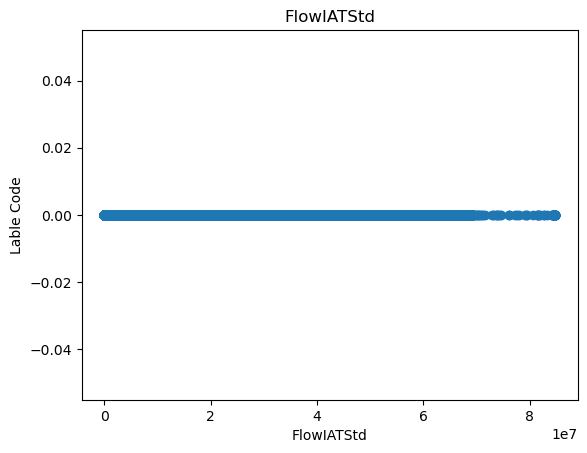

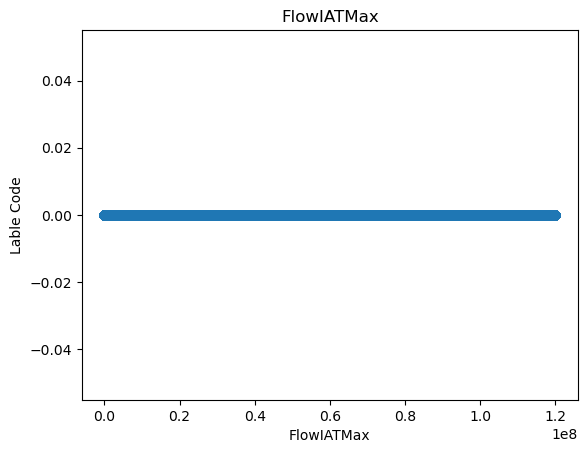

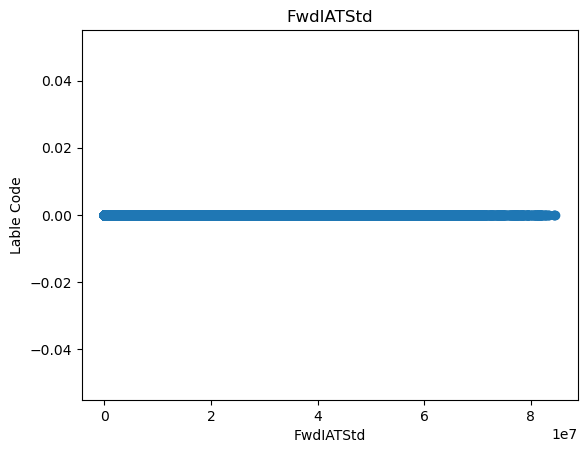

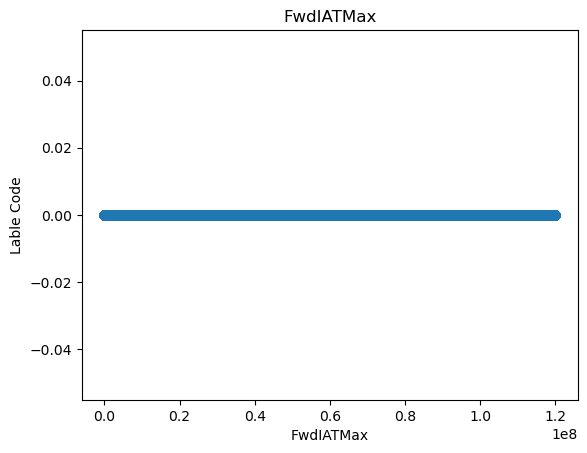

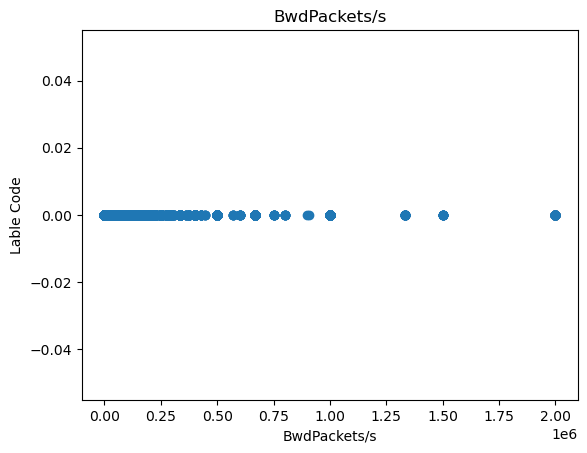

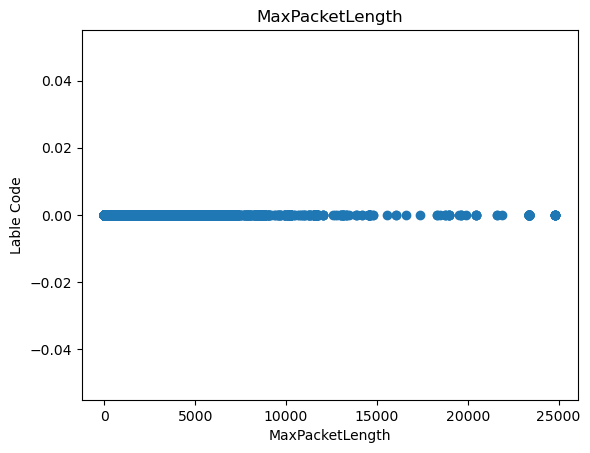

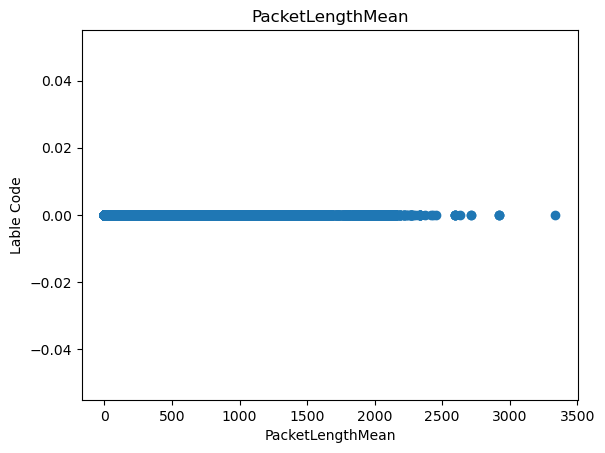

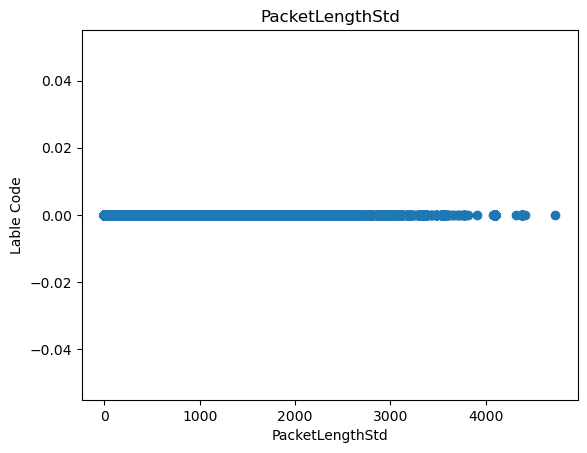

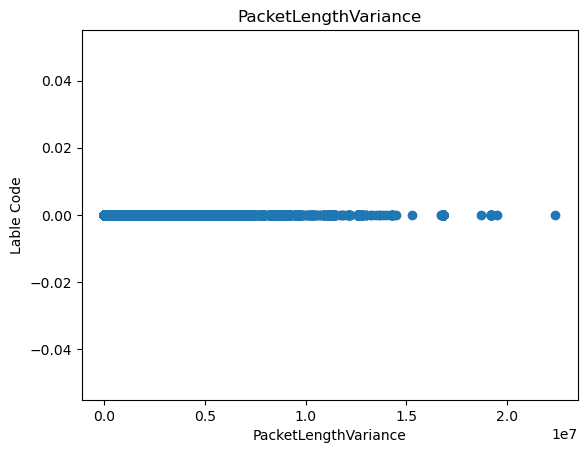

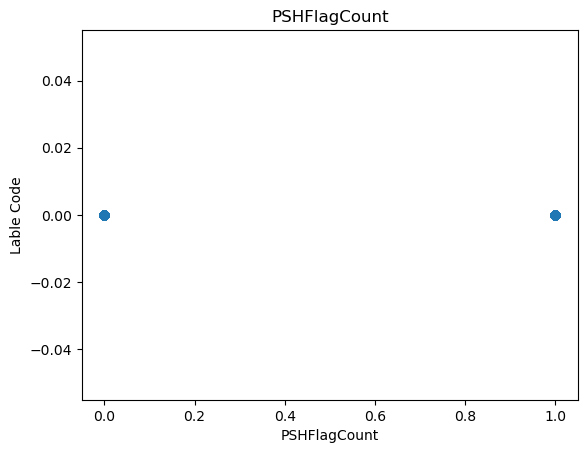

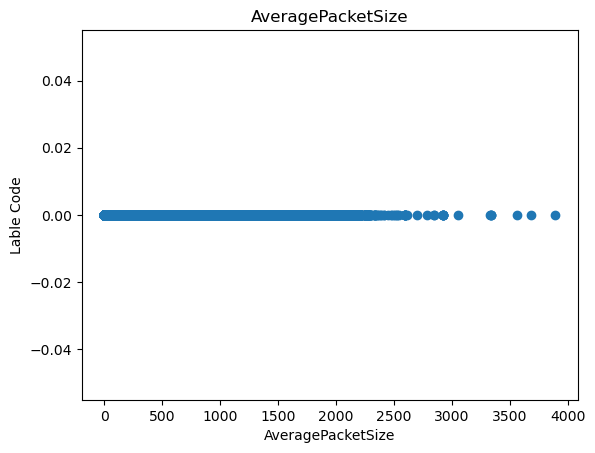

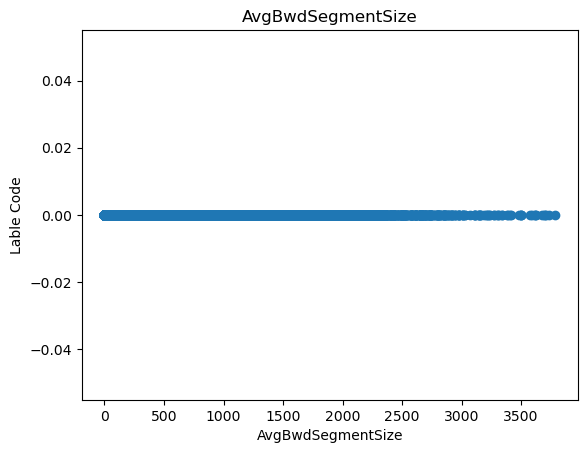

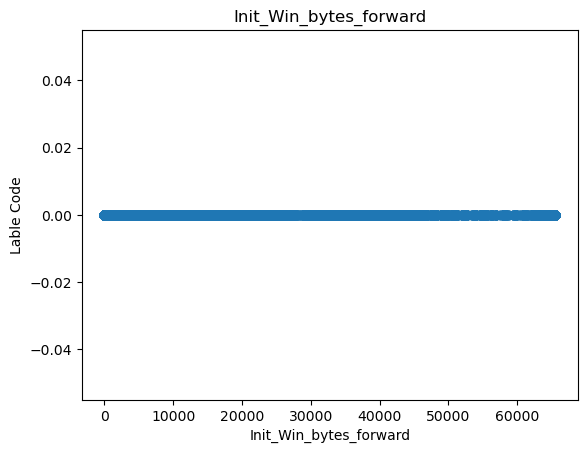

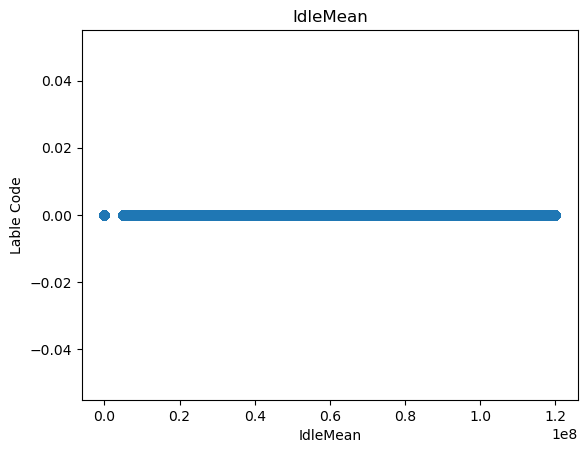

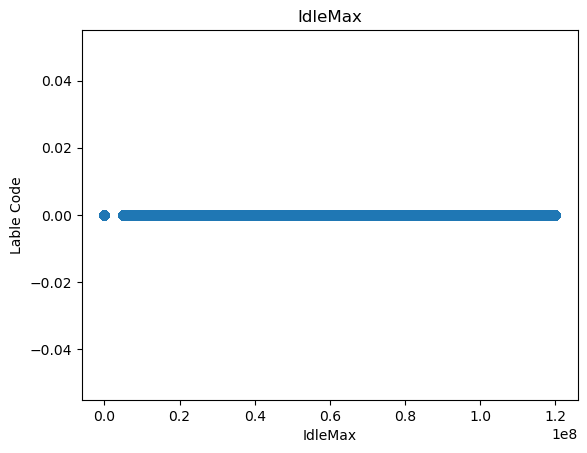

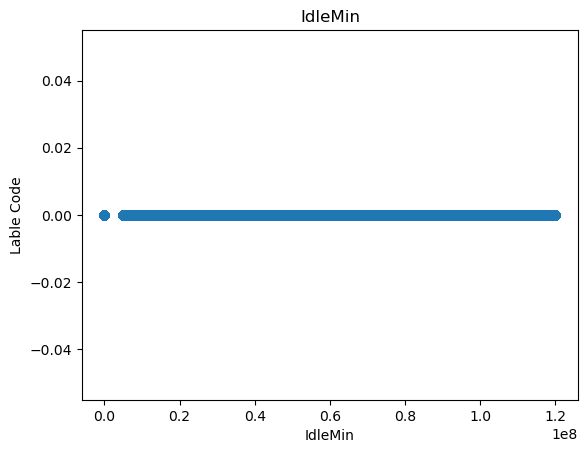

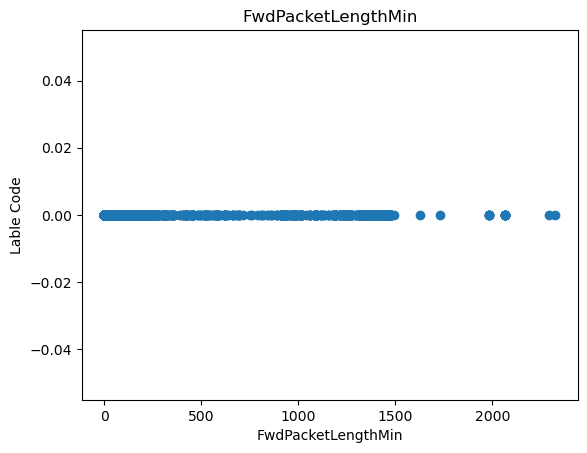

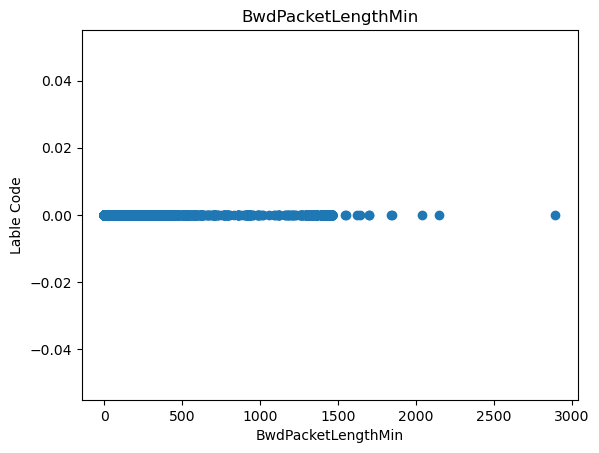

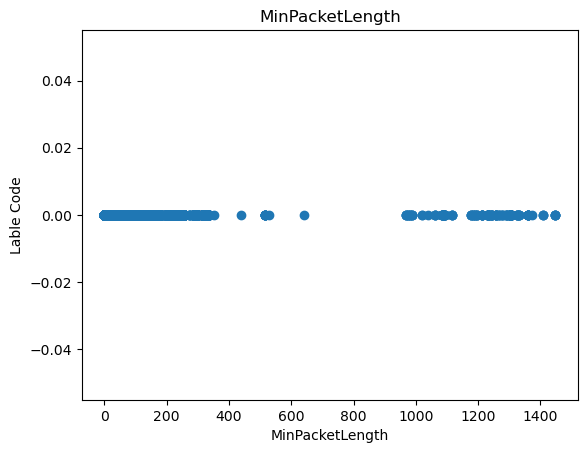

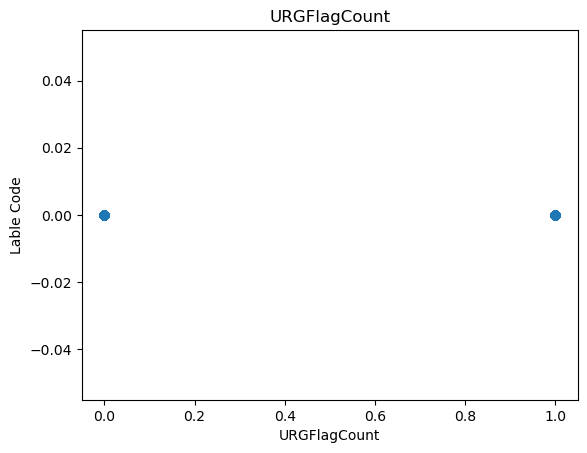

In [19]:
#evaluating benign traffic only
df_benign = df[df['Label'] == 'BENIGN']
for col in correlated_cols:
    x = df_benign[col]
    y = df_benign['label_code']
    plt.scatter(x, y)
    plt.xlabel(col)
    plt.ylabel('Lable Code')
    plt.title(col)
    plt.show()

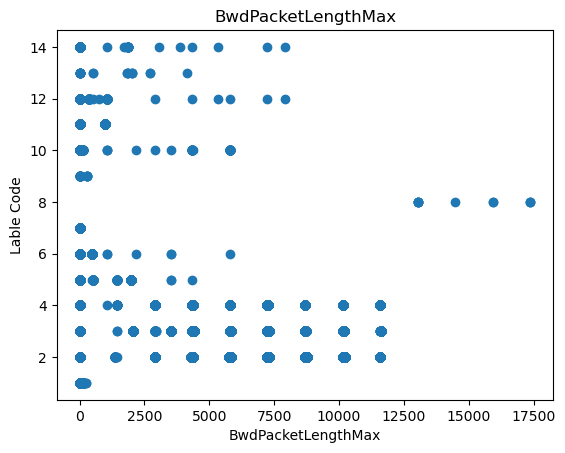

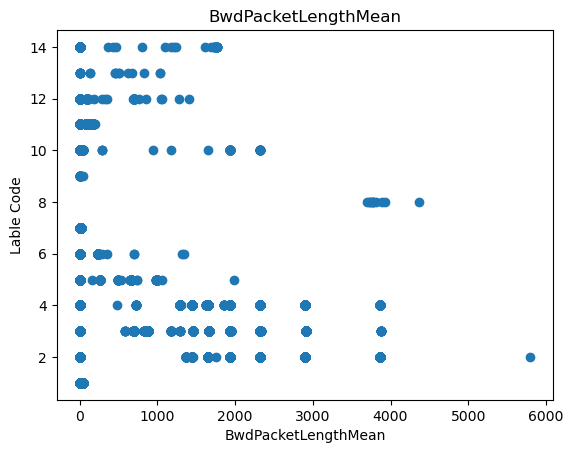

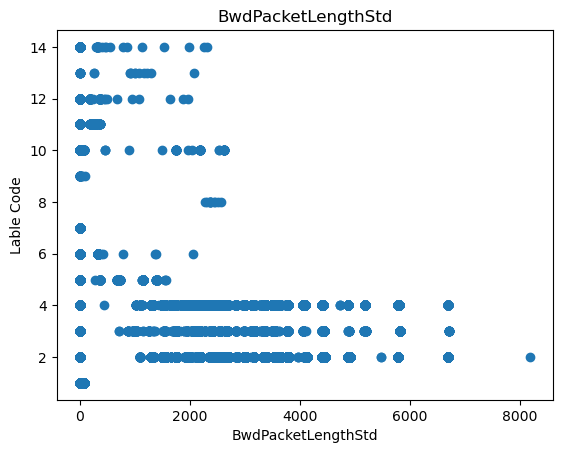

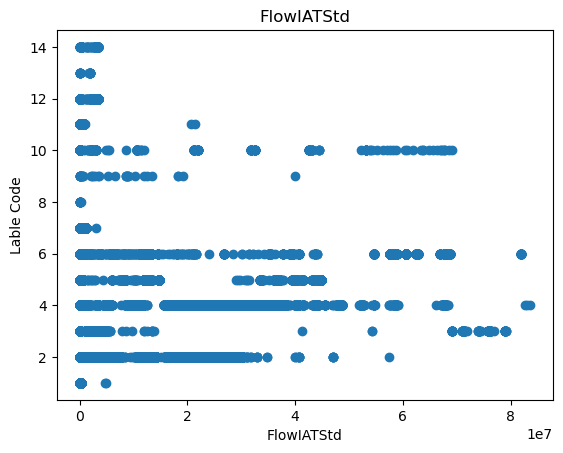

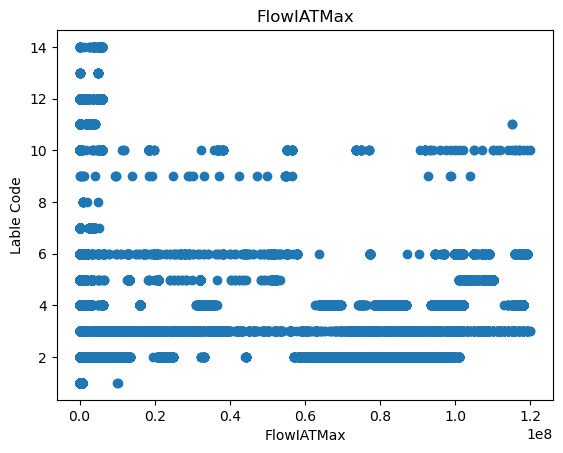

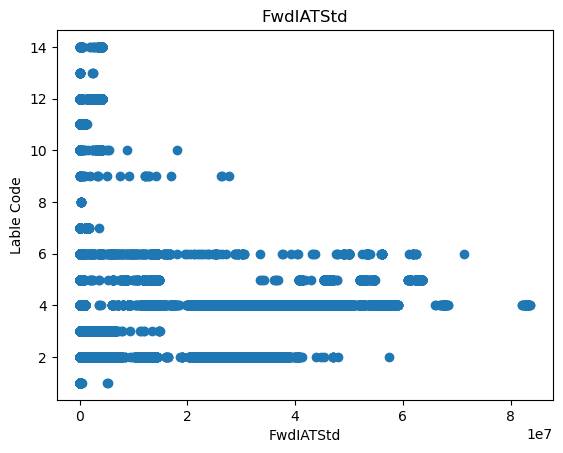

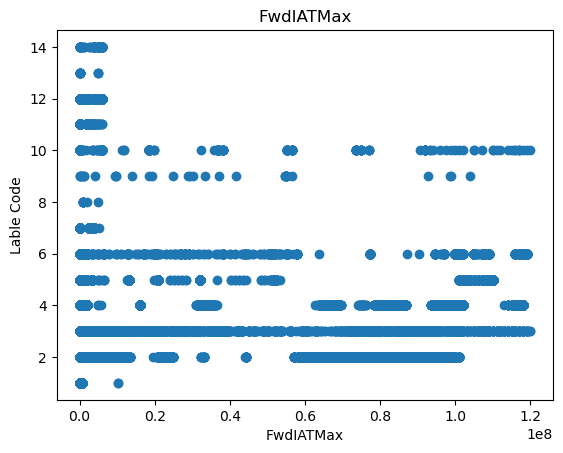

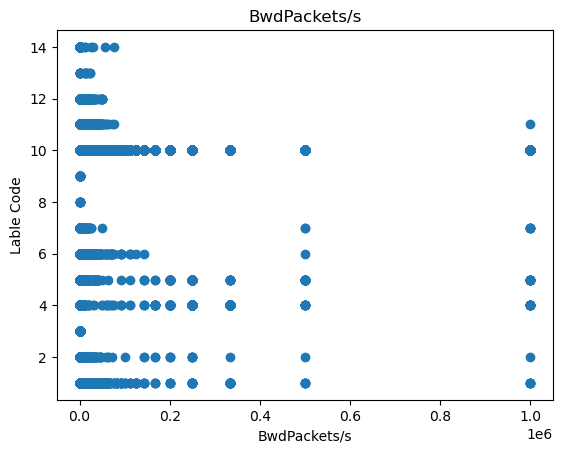

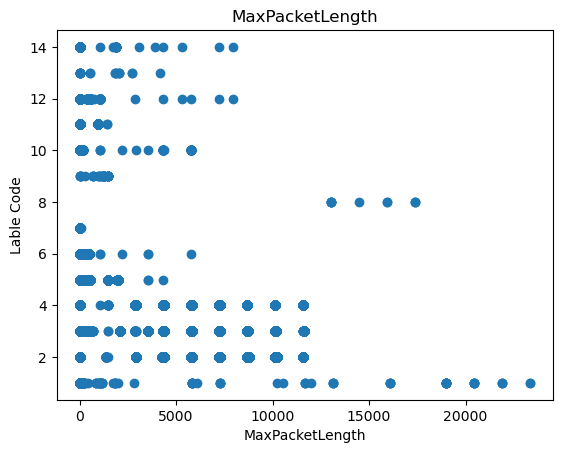

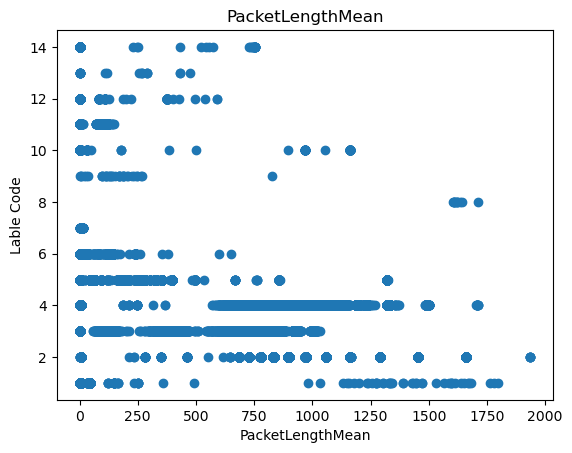

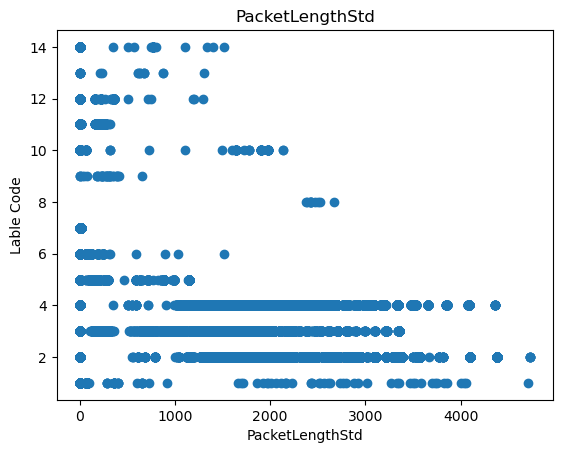

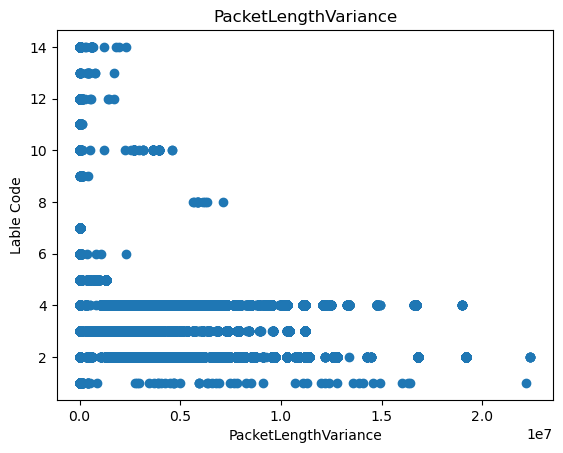

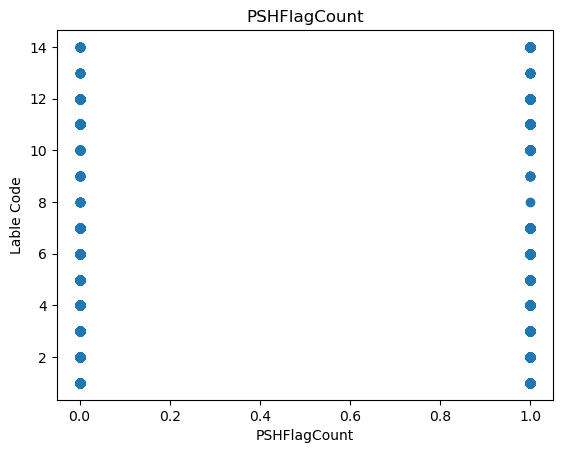

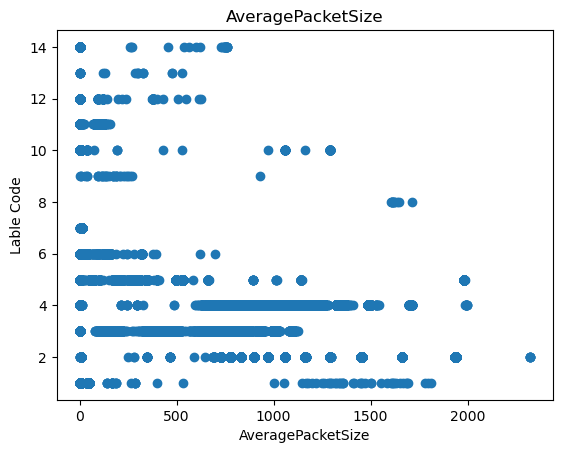

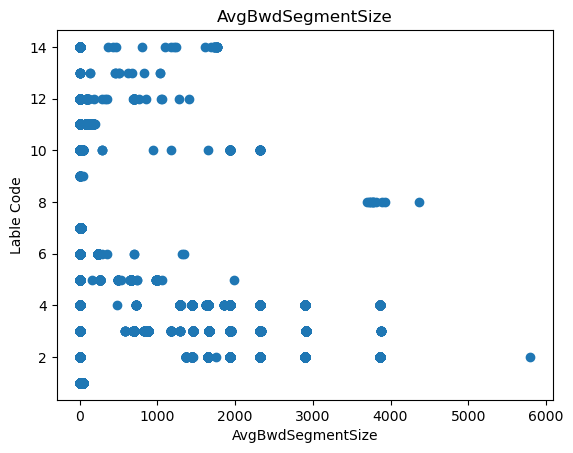

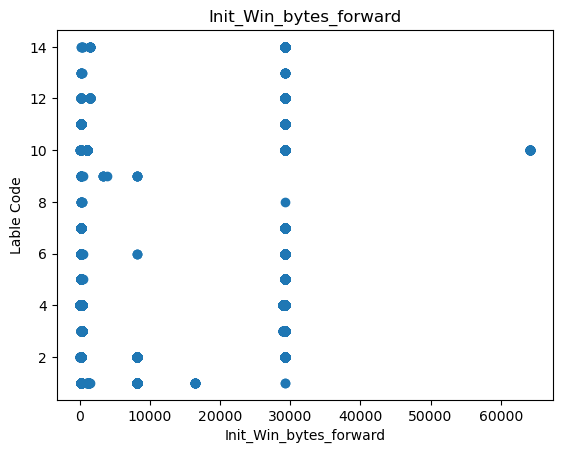

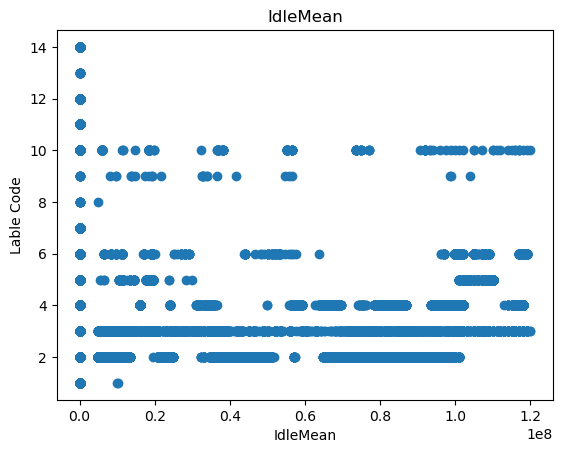

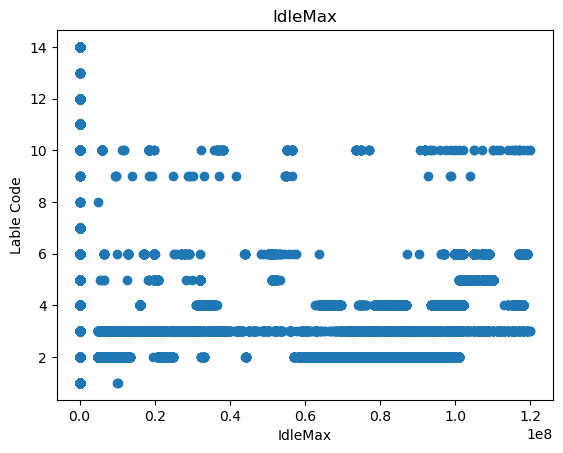

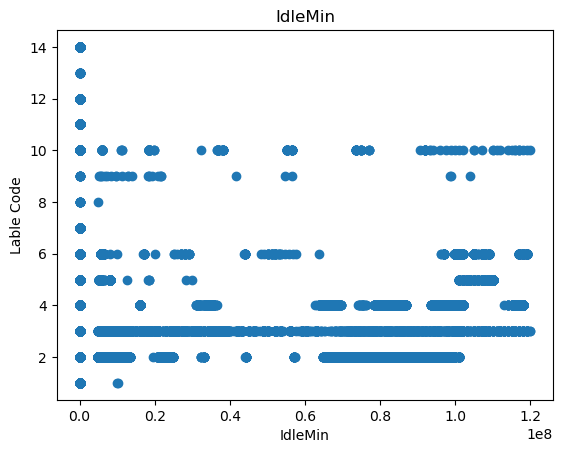

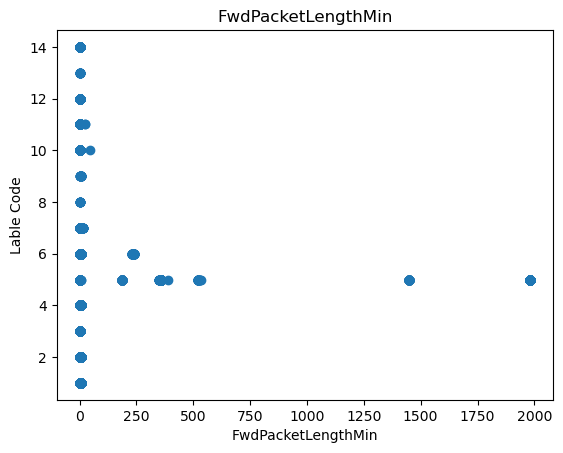

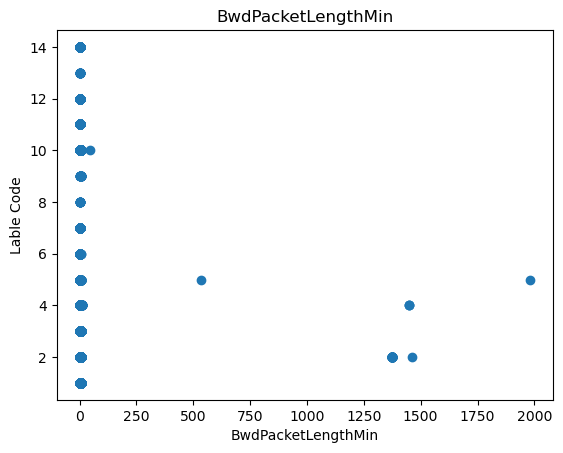

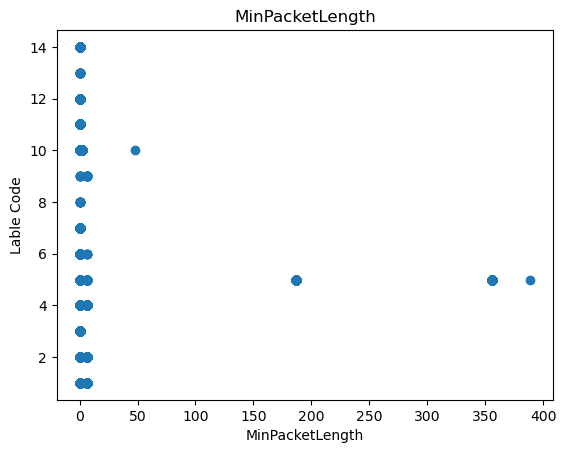

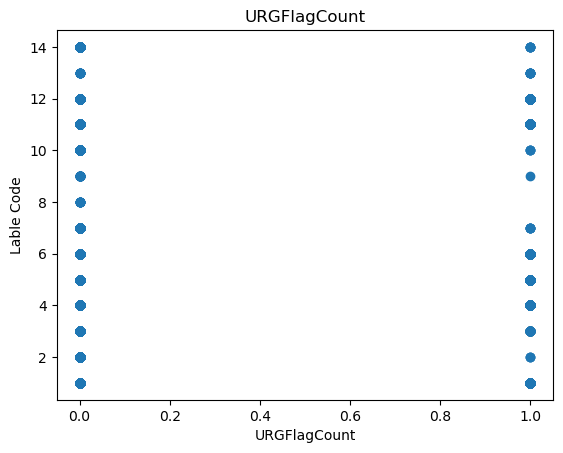

In [20]:
#evaluating malicious traffic only
df_malicious = df[df['Label'] != 'BENIGN']
for col in correlated_cols:
    x = df_malicious[col]
    y = df_malicious['label_code']
    plt.scatter(x, y)
    plt.xlabel(col)
    plt.ylabel('Lable Code')
    plt.title(col)
    plt.show()

<p>After evaluating the malicious and benign data separately, there is a lot more spread between datapoints on malicious data than benign data. Benign data appears consistent across the correlated features, where malicious data is not. This makes me believe that the inconsistencies will be the key to determining malicious from benign data.</p>

## Conclusion

<p>While none of the data appeared to be very strongly related, looking at the relationships between the types of attacks and each chosen feature, it can be determined that there is a distinct pattern difference between the benign and malicious data. It is my belief that the patterns shown in the scatter plots above will be instrumental when modeling to determine if traffic is an attack or not.</p>

<p>I was expecting there to be more strongly of a correlation between some of the features and the labels, but these attacks are designed to masquerade as regular traffic to a certain extent, so I am not particularly surprised either.</p>

<p>Moving forward, I believe decision trees will be the best model for this project.</p>